<a href="https://colab.research.google.com/github/MK49594/Activity-2-/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [169]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [170]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [172]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [173]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [174]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-174-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [175]:
#merged_data.dtypes

In [176]:
pollution_data = merged_data[['pm10','neighborhood']]

In [177]:
pollution_data.shape[0]

118495

In [178]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [179]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [180]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [181]:
pollution_data['pm10'].min()

0.0

In [182]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [183]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [184]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

## **Display the first 5 rows - This time we will do it for ['pm10', 'neighborhood']**

In [185]:
print("First 5 rows of the joined table:")
joined_table.show(5)

First 5 rows of the joined table:


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [186]:
# Print the number of rows and columns in the table

In [187]:
print(f"Number of rows: {joined_table.num_rows}")
print(f"Number of columns: {joined_table.num_columns}")

Number of rows: 118495
Number of columns: 2


In [188]:
# Check for missing values in the table

In [189]:
# Identify missing values
print("Missing values per column:")
for col in ['pm10', 'neighborhood']:
    missing_count = joined_table.where(joined_table.apply(lambda x: x is None or x != x, col)).num_rows
    print(f"{col}: {missing_count}")

# Handle missing values (drop or fill)
joined_table = joined_table.with_columns(
    'pm10', joined_table.apply(lambda x: 0 if x is None or x != x else x, 'pm10'),
    'neighborhood', joined_table.apply(lambda x: 'Unknown' if x is None or x != x else x, 'neighborhood')
)

Missing values per column:
pm10: 0
neighborhood: 0


#**Extract all required columns <-- we will need this in Task 2 later**

In [190]:
pollution_data = merged_data[['pm10', 'neighborhood', 'borough', 'temperature', 'humidity', 'pm25']]

# Convert from DataFrame to datascience Table
joined_table = Table.from_df(pollution_data, keep_index=False)

# Display the first 5 rows of the joined_table
print("First 5 rows of the joined table:")
joined_table.show(5)

# Print the number of rows and columns in the table
print(f"Number of rows: {joined_table.num_rows}")
print(f"Number of columns: {joined_table.num_columns}")


First 5 rows of the joined table:


pm10,neighborhood,borough,temperature,humidity,pm25
11.35,Bronx Park,Bronx,16.3,15.2,5.91
1.18,Bronx Park,Bronx,16.2,15.1,1.18
0.76,Bronx Park,Bronx,16.1,15.1,0.76
47.36,Bronx Park,Bronx,16.1,15.2,4.48
6.18,Bronx Park,Bronx,16,15.2,5.77


Number of rows: 118495
Number of columns: 6


In [191]:
# Identify missing values
print("Missing values per column:")
for col in ['pm10', 'neighborhood', 'borough', 'temperature', 'humidity', 'pm25']:
    missing_count = joined_table.where(joined_table.apply(lambda x: x is None or x != x, col)).num_rows
    print(f"{col}: {missing_count}")

# Handle missing values (drop or fill)
joined_table = joined_table.with_columns(
    'pm10', joined_table.apply(lambda x: 0 if x is None or x != x else x, 'pm10'),
    'neighborhood', joined_table.apply(lambda x: 'Unknown' if x is None or x != x else x, 'neighborhood'),
    'temperature', joined_table.apply(lambda x: np.nanmean(joined_table.column('temperature')) if x is None or x != x else x, 'temperature'),
    'humidity', joined_table.apply(lambda x: np.nanmean(joined_table.column('humidity')) if x is None or x != x else x, 'humidity'),
    'pm25', joined_table.apply(lambda x: 0 if x is None or x != x else x, 'pm25')
)

Missing values per column:
pm10: 0
neighborhood: 0
borough: 0
temperature: 0
humidity: 0
pm25: 0


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

### **First we define functions for computing statistics, and then extract columns using  .column()**

In [192]:
# Define all the functions:

def compute_mean(values):
    return np.mean(values)

def compute_median(values):
    return np.median(values)

def compute_min(values):
    return np.min(values)

def compute_max(values):
    return np.max(values)

temp_values = joined_table.column('temperature')
humidity_values = joined_table.column('humidity')
pm25_values = joined_table.column('pm25')

### **Create summary statistics table using table operations, then Display summary statistics.**

In [193]:
summary_stats = Table().with_columns(
    'Statistic', ['Mean', 'Median', 'Minimum', 'Maximum']
)

# Compute summary statistics for each column
for col in ['temperature', 'humidity', 'pm25']:
    summary_stats = summary_stats.with_column(
        col,
        [
            compute_mean(joined_table.column(col)),   # Compute mean
            compute_median(joined_table.column(col)), # Compute median
            compute_min(joined_table.column(col)),    # Compute min
            compute_max(joined_table.column(col))     # Compute max
        ]
    )

# Display summary statistics
print("Summary Statistics:")
summary_stats.show()


Summary Statistics:


Statistic,temperature,humidity,pm25
Mean,8.24158,50.1549,7.37452
Median,7.2,46.2,3.02
Minimum,-7.9,0,0
Maximum,10471,104.2,3267.02


### **Group by borough and calculate average pm25 levels using .group()**

In [194]:
borough_pm25 = joined_table.select('borough', 'pm25').group('borough', np.mean)
borough_pm25 = borough_pm25.sort('pm25 mean', descending=True)

# Display average pm25 by borough
print("\nAverage pm25 by Borough:")
borough_pm25.show()


Average pm25 by Borough:


borough,pm25 mean
Bronx,7.795
Manhattan,2.37332
Queens,2.07253
Brooklyn,1.99695


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

### **Bar chart showing average pm25 levels by borough**

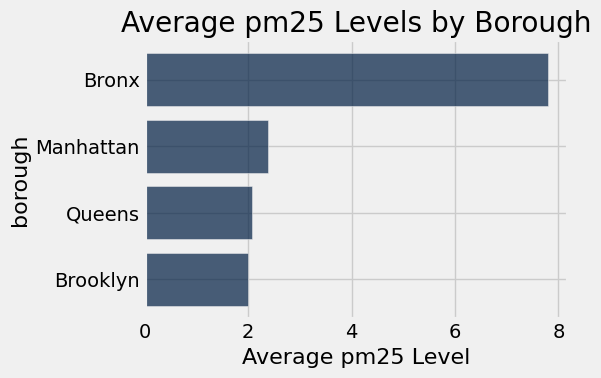

In [195]:
# Bar chart showing average pm25 levels by borough
num_rows = min(10, borough_pm25.num_rows)
top_boroughs = borough_pm25.take(np.arange(num_rows))

top_boroughs.barh('borough', 'pm25 mean')
plt.xlabel('Average pm25 Level')
plt.title('Average pm25 Levels by Borough')
plt.tight_layout()
plt.show()


### **Scatter plot for temperature vs pm25**

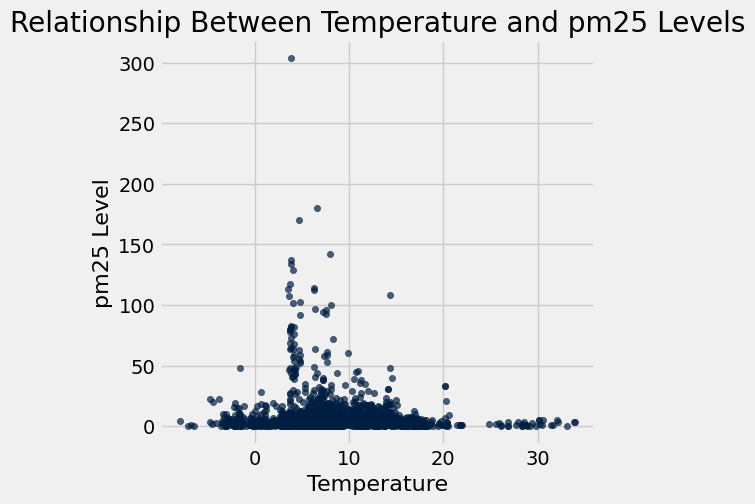

In [196]:
# Sample a subset to avoid overcrowding the plot
sample_size = min(2000, joined_table.num_rows)
sampled_data = joined_table.sample(sample_size)
sampled_data.scatter('temperature', 'pm25')
plt.xlabel('Temperature')
plt.ylabel('pm25 Level')
plt.title('Relationship Between Temperature and pm25 Levels')
plt.show()

### **Histogram of humidity values**

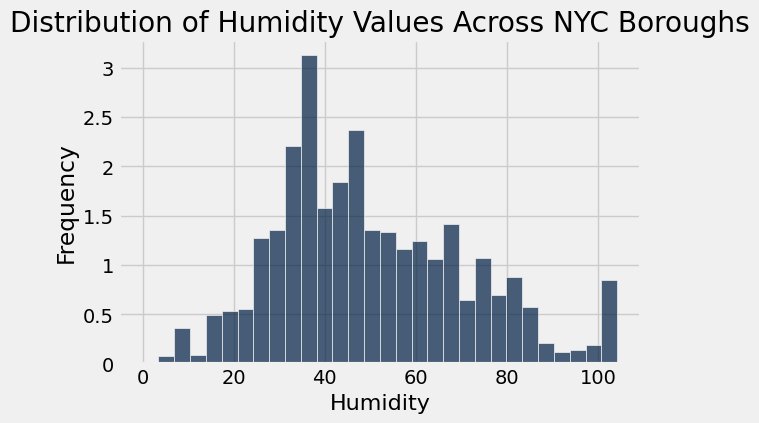

In [197]:
joined_table.hist('humidity', bins=30)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Humidity Values Across NYC Boroughs')
plt.show()


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [198]:
# Define function to categorize pm25 levels as specified
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"

# Apply the function to create a new column
joined_table_with_categories = joined_table.with_column(
    'PM25_Category',
    joined_table.apply(calculate_pm25_category, 'pm25')
)

# Count readings in each category
pm25_categories = joined_table_with_categories.group('PM25_Category')

print("pm25 Categories:")
pm25_categories.show()

pm25 Categories:


PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [199]:
# Randomly sample 10% of the rows without replacement
sample_size = int(joined_table.num_rows * 0.1)
sampled_data = joined_table.sample(sample_size, with_replacement=False)


In [200]:
# Calculate the mean pm25 level for the sampled data
sampled_mean = np.mean(sampled_data.column('pm25'))
print(f"\nMean pm25 level for a 10% sample: {sampled_mean:.2f}")

# Population mean for comparison
population_mean = np.mean(joined_table.column('pm25'))
print(f"Population mean pm25 level: {population_mean:.2f}")


Mean pm25 level for a 10% sample: 7.36
Population mean pm25 level: 7.37


**The population mean (7.37)** represents the true average pm25 level across the entire dataset, while **the sample mean (7.36)** is an estimate based on a randomly selected 10% sample. The small difference between them is due to sampling variability, but **since they are very close, it confirms that our sample accurately represents the population**.

In [201]:
# Repeat the random sampling process 100 times
sample_means = []
for i in range(100):
    sample = joined_table.sample(sample_size)
    sample_means.append(np.mean(sample.column('pm25')))

# Create a Table of sample means
sample_means_table = Table().with_column('Sample Means', sample_means)

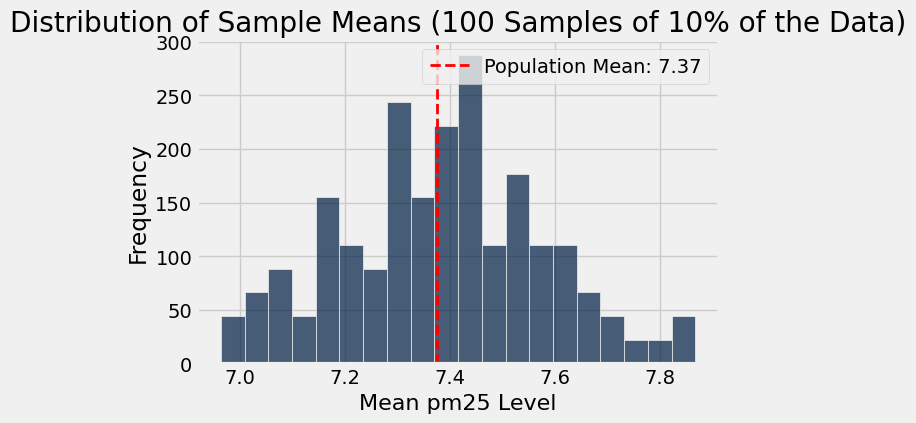

In [202]:
# Create a histogram of the 100 mean pm25 values using the Table's hist method
sample_means_table.hist(bins=20)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label=f'Population Mean: {population_mean:.2f}')
plt.xlabel('Mean pm25 Level')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (100 Samples of 10% of the Data)')
plt.legend()
plt.show()

In [203]:
# Statistics of the sampling distribution
print("\nStatistics of the Sampling Distribution:")
print(f"Mean of sample means: {np.mean(sample_means):.2f}")
print(f"Standard deviation of sample means: {np.std(sample_means):.2f}")
print(f"Minimum sample mean: {min(sample_means):.2f}")
print(f"Maximum sample mean: {max(sample_means):.2f}")


Statistics of the Sampling Distribution:
Mean of sample means: 7.39
Standard deviation of sample means: 0.19
Minimum sample mean: 6.96
Maximum sample mean: 7.87


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.